In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
clinical_df = pd.read_csv('../data/Clinical/SKCM_DATA_Clinical.csv', index_col = 0)
clinical_df.set_index('submitter_id',inplace=True)
clinical_df = clinical_df[~clinical_df.index.duplicated(keep='first')]
print(clinical_df.shape)
clinical_df.head()

(470, 73)


,synchronous_malignancy,ajcc_pathologic_stage,tumor_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,age_at_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,prior_treatment,state,days_to_last_known_disease_status,ajcc_staging_system_edition,ajcc_pathologic_t,days_to_recurrence,morphology,ajcc_pathologic_n,ajcc_pathologic_m,classification_of_tumor,diagnosis_id,icd_10_code,site_of_resection_or_biopsy,tumor_grade,progression_or_recurrence,cigarettes_per_day,alcohol_history,exposure_id,years_smoked,weight,alcohol_intensity,height,bmi,race,gender,ethnicity,vital_status,age_at_index,days_to_birth,year_of_birth,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_intent_type,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_type,treatments_pharmaceutical_therapeutic_agents,treatments_pharmaceutical_treatment_or_therapy,treatments_pharmaceutical_days_to_treatment_end,treatments_pharmaceutical_days_to_treatment_start,treatments_pharmaceutical_regimen_or_line_of_therapy,treatments_pharmaceutical_treatment_effect,treatments_pharmaceutical_initial_disease_status,treatments_pharmaceutical_treatment_anatomic_site,treatments_pharmaceutical_treatment_outcome,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_id,treatments_radiation_treatment_type,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease,sample_type
submitter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-BF-A1PZ,No,Stage IIB,stage iib,0.0,NaN,not reported,"Skin, NOS",853.0,"Malignant melanoma, NOS",26240.0,2019-08-08T17:29:28.028808-05:00,no,2010.0,No,released,NaN,7th,T4a,NaN,8720/3,N0,M0,not reported,58877acc-4579-5cbc-b0d7-a1a60f9d9360,C44.9,"Skin, NOS",not reported,not reported,NaN,Not Reported,3224ecb7-496a-52b2-bb06-79faa29362bd,NaN,56.0,NaN,163.0,21.077195,white,female,not hispanic or latino,Alive,71.0,-26240.0,1939.0,a951cc17-255b-52c1-8b16-06a110a1f256,NaN,NaN,NaN,a738fcf5-fbc5-54ae-9aca-a474c981980b,"Pharmaceutical Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606f9d0c-405a-51a7-83b6-850abd587e3e,"Radiation Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-BF-A1PZ,SKCM,Primary Tumor
TCGA-HR-A5NC,No,NaN,not reported,0.0,NaN,not reported,"Skin, NOS",0.0,"Malignant melanoma, NOS",32872.0,2019-08-08T17:32:34.888606-05:00,no,NaN,No,released,NaN,6th,T4,NaN,8720/3,NX,M0,not reported,0a71cde5-a658-58fa-8f7d-5b461ed5ba0d,C44.5,Skin of trunk,not reported,not reported,NaN,Not Reported,6f513e61-8df3-557c-8970-79ed709b496c,NaN,NaN,NaN,152.0,NaN,not reported,female,not reported,Alive,90.0,-32872.0,NaN,2bf37b46-b292-5211-8308-8e7478e13fac,NaN,NaN,NaN,0a4cb88c-3f7d-58b9-861e-4e99f1e79879,"Pharmaceutical Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5bec652c-8fcf-5693-ba5f-a4c685cfbafd,"Radiation Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-HR-A5NC,SKCM,Primary Tumor
TCGA-EE-A183,No,Stage 0,stage 0,0.0,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",17788.0,2019-08-08T17:31:00.525265-05:00,no,2007.0,No,released,NaN,6th,Tis,NaN,8720/3,N0,M0,not reported,ad50acaa-3906-5038-a738-b1df7206c3fb,C77.3,Lymph nodes of axilla or arm,not reported,not reported,NaN,Not Reported,5e224124-5dc5-5e14-a52d-aebafebbdae1,NaN,NaN,NaN,NaN,NaN,white,male,not hispanic or latino,Dead,48.0,-17788.0,1959.0,f890ebbe-7014-5316-9088-92d883eb8050,2009.0,818.0,NaN,2ac616a8-887f-53c2-a8ea-ae66c6d48a02,"Pharmaceutical Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f7775347-3381-519c-b1fd-c61f6d261154,"Radiation Therapy, NOS"

In [3]:
clinical_df.groupby(['sample_type','gender'])['sample_type'].agg(['count'])

count
sample_type         gender       
Metastatic          female    138
                    male      227
Primary Tumor       female     42
                    male       61
Solid Tissue Normal male        1

In [14]:
clinical_df.groupby(['sample_type','ethnicity'])['sample_type'].agg(['count'])

count
sample_type         ethnicity                    
Metastatic          hispanic or latino          7
                    not hispanic or latino    350
                    not reported                8
Primary Tumor       hispanic or latino          4
                    not hispanic or latino     94
                    not reported                5
Solid Tissue Normal not hispanic or latino      1

In [19]:
clinical_df['bmi']

submitter_id
TCGA-BF-A1PZ    21.077195
TCGA-HR-A5NC          NaN
TCGA-EE-A183          NaN
TCGA-D3-A8GV    30.793382
TCGA-W3-AA1R    26.543210
TCGA-WE-A8ZX          NaN
TCGA-BF-A1Q0    23.054562
TCGA-DA-A1I2          NaN
TCGA-EB-A82B    21.484375
TCGA-D3-A51G    31.024931
TCGA-GF-A4EO    38.104224
TCGA-D3-A51F    25.737081
TCGA-D3-A3MR    26.543210
TCGA-3N-A9WD    34.638239
TCGA-ER-A19E          NaN
TCGA-D3-A3C1    25.904310
TCGA-EB-A5SH    19.841270
TCGA-EE-A29E          NaN
TCGA-BF-A5EQ    28.405504
TCGA-FR-A69P    25.393431
TCGA-EB-A3XF    26.566840
TCGA-D3-A3CF    49.154092
TCGA-D3-A8GL    31.950790
TCGA-D3-A5GU    23.939481
TCGA-WE-A8ZR          NaN
TCGA-D3-A2JF    27.681661
TCGA-EB-A5VV    37.500000
TCGA-DA-A95V          NaN
TCGA-GF-A769    26.566840
TCGA-ER-A3PL          NaN
TCGA-XV-AAZY    24.023809
TCGA-ER-A19T    27.968016
TCGA-FS-A1ZR          NaN
TCGA-FS-A1ZJ          NaN
TCGA-HR-A2OG          NaN
TCGA-D3-A8GN    23.507805
TCGA-EB-A5SG    23.243408
TCGA-EE-A3J7          NaN

In [6]:
clinical_df['bmi'].describe()

count    250.000000
mean      27.941862
std        6.104201
min       17.630854
25%       23.536664
50%       26.609745
75%       31.384390
max       55.473373
Name: bmi, dtype: float64

In [18]:
print(clinical_df[(clinical_df['bmi'] <= 18.5)]['bmi'].count())
print(clinical_df[(clinical_df['bmi']> 19.0) & (clinical_df['bmi'] <= 24.9)]['bmi'].count())
print(clinical_df[(clinical_df['bmi']> 25.0) & (clinical_df['bmi'] <= 29.9)]['bmi'].count())
print(clinical_df[(clinical_df['bmi']>= 30.0)]['bmi'].count())

5
73
88
78


In [16]:
5+73+88+78

244

In [7]:
# Below 18.5    Underweight
# 18.5 – 24.9    Normal or Healthy Weight
# 25.0 – 29.9    Overweight
# 30.0 and Above    Obese
print(clinical_df['bmi'].between(0, 18.5, inclusive=False).count())
print(clinical_df['bmi'].between(18.5, 24.9, inclusive=False).count())
print(clinical_df['bmi'].between(25, 29.9, inclusive=False).count())
print(clinical_df['bmi'].between(30, 100, inclusive=False).count())

470
470
470
470


Metastatic             365
Primary Tumor          103
Solid Tissue Normal      1
Name: sample_type, dtype: int64


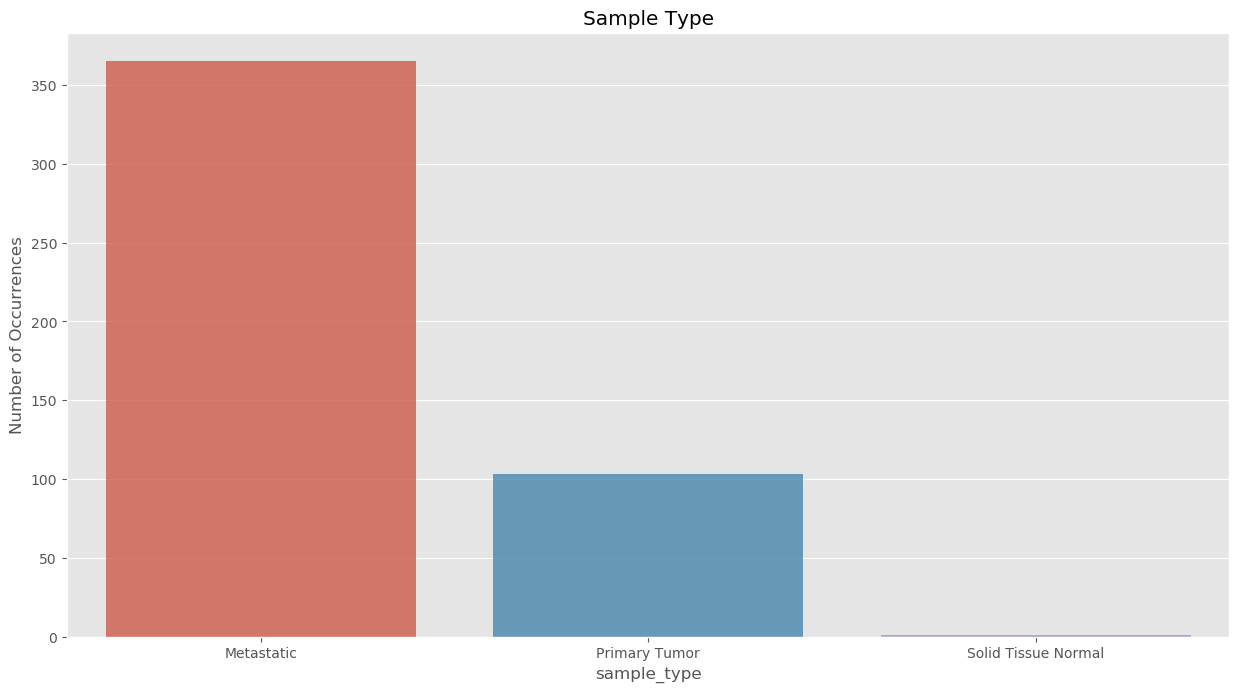

In [4]:
count  = clinical_df['sample_type'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Sample Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sample_type', fontsize=12)
plt.show()

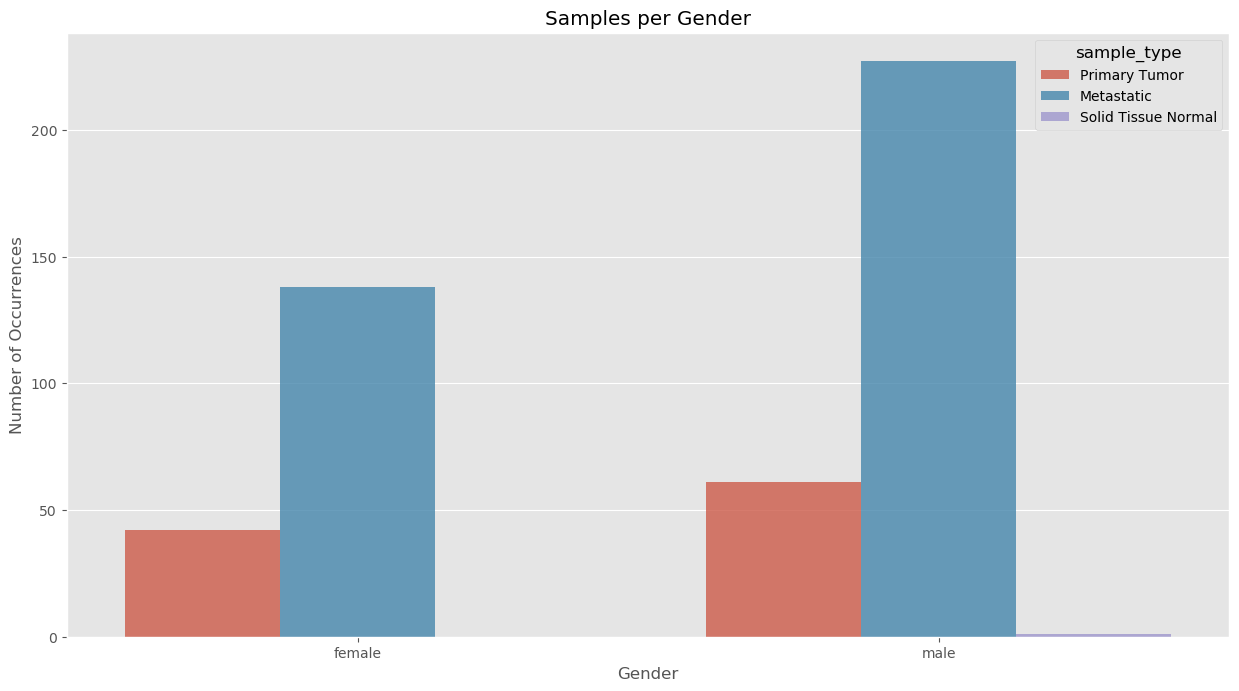

In [5]:
plt.figure()
sns.countplot(data=clinical_df, x='gender', hue='sample_type', alpha=0.8)
plt.title('Samples per Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

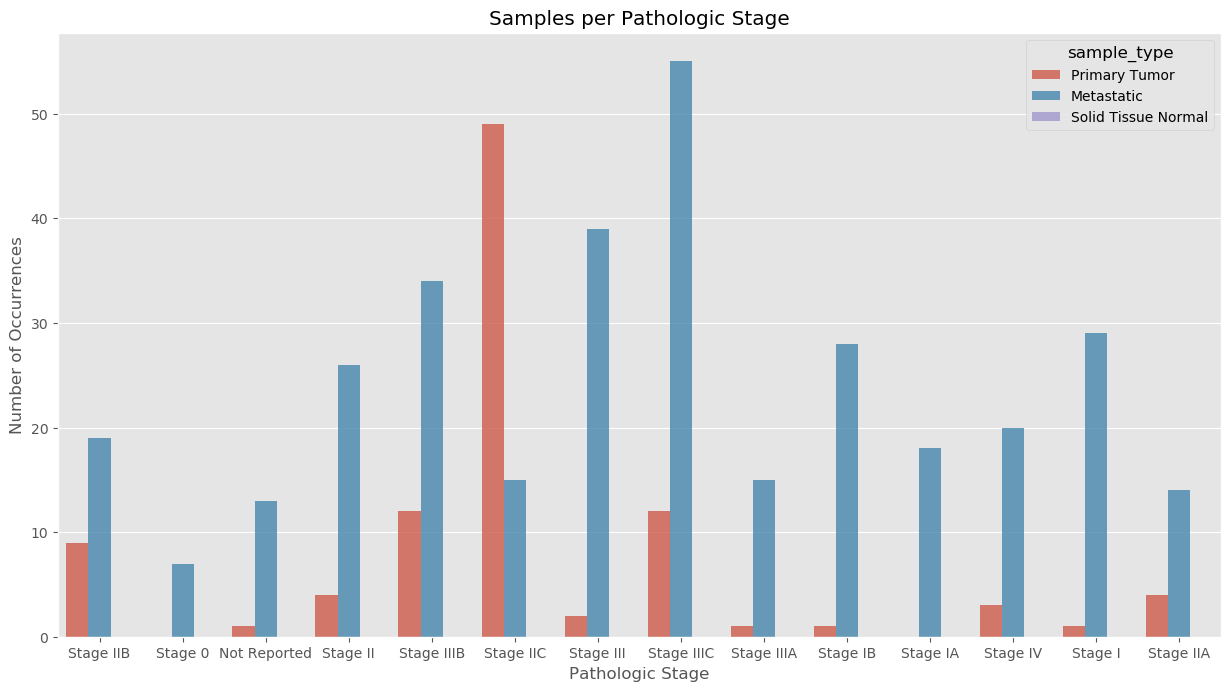

In [6]:
plt.figure()
sns.countplot(data=clinical_df, x='ajcc_pathologic_stage', hue='sample_type', alpha=0.8)
plt.title('Samples per Pathologic Stage')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Pathologic Stage', fontsize=12)
plt.show()

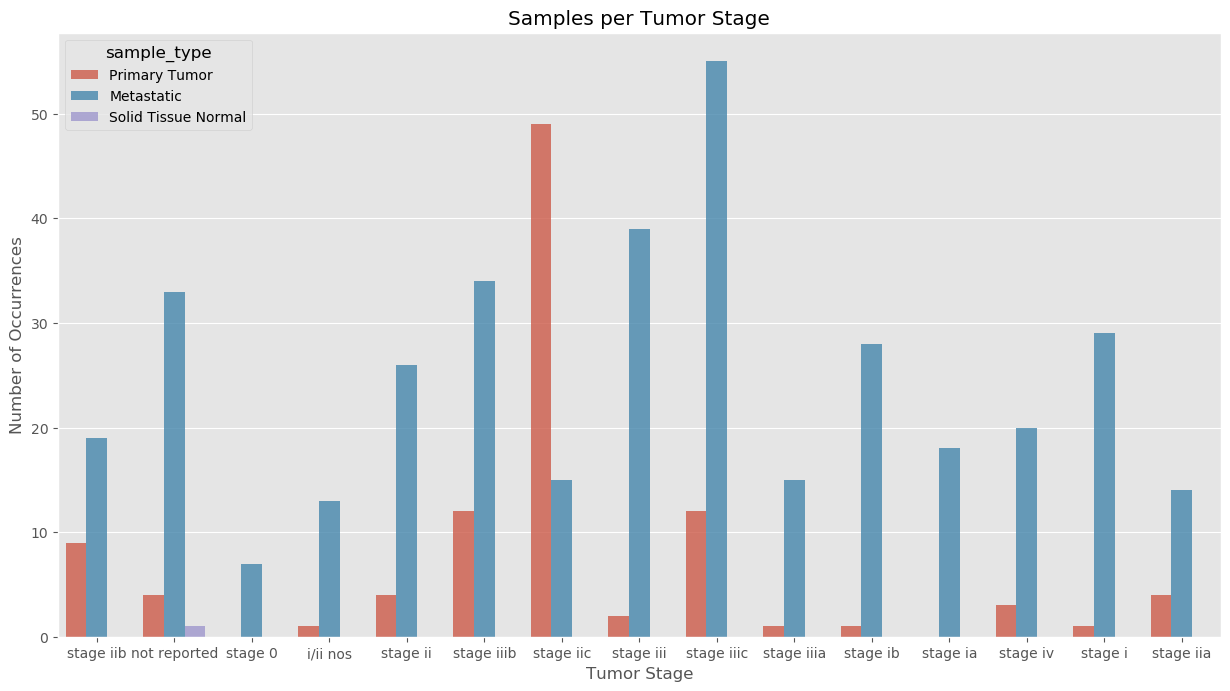

In [7]:
plt.figure()
sns.countplot(data=clinical_df, x='tumor_stage', hue='sample_type', alpha=0.8)
plt.title('Samples per Tumor Stage')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tumor Stage', fontsize=12)
plt.show()

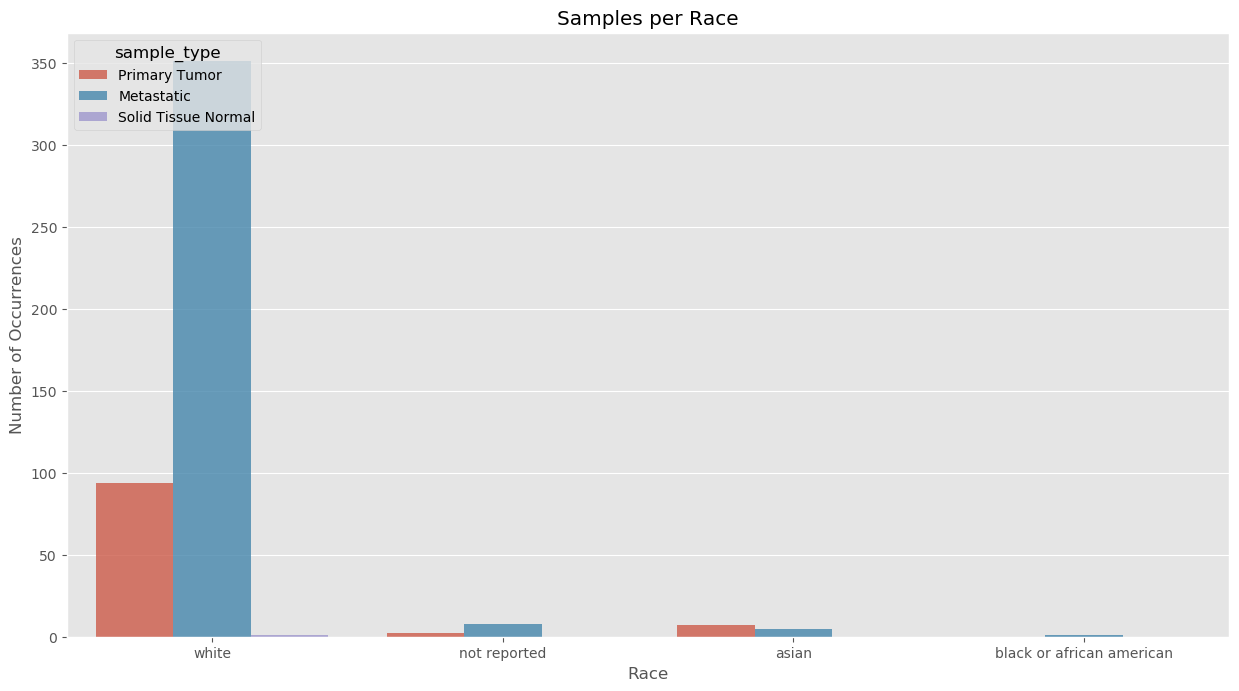

In [8]:
plt.figure()
sns.countplot(data=clinical_df, x='race', hue='sample_type', alpha=0.8)
plt.title('Samples per Race')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

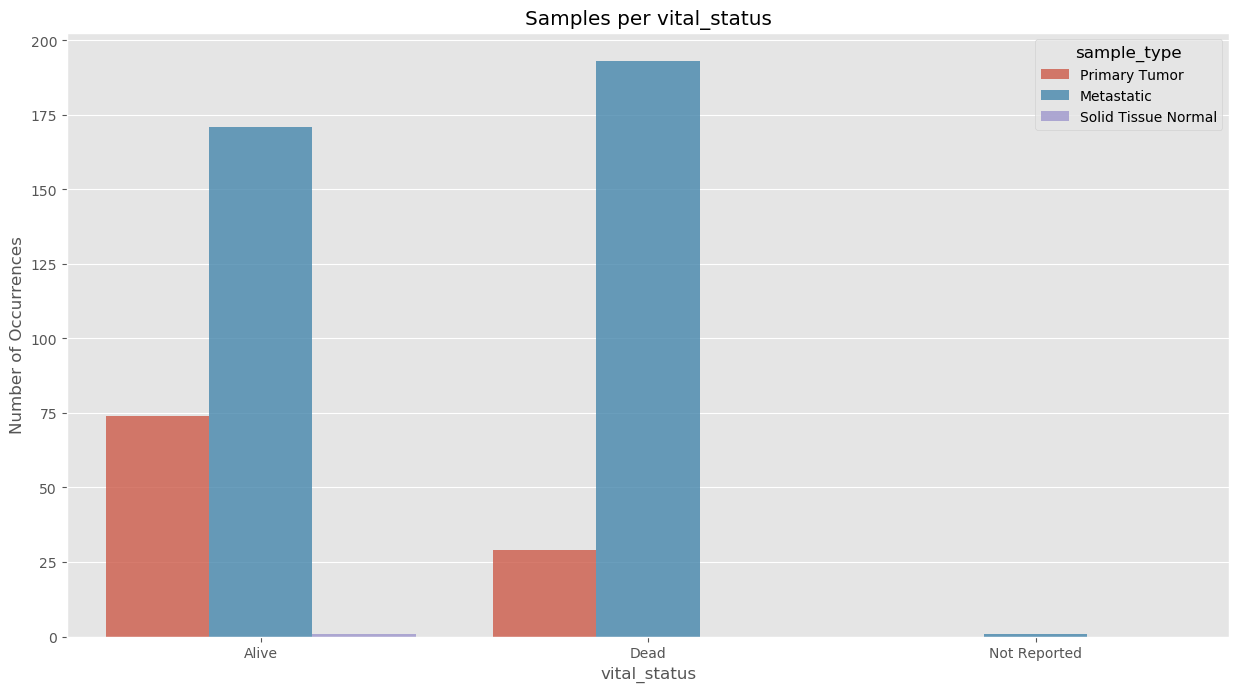

In [9]:
plt.figure()
sns.countplot(data=clinical_df, x='vital_status', hue='sample_type', alpha=0.8)
plt.title('Samples per vital_status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('vital_status', fontsize=12)
plt.show()

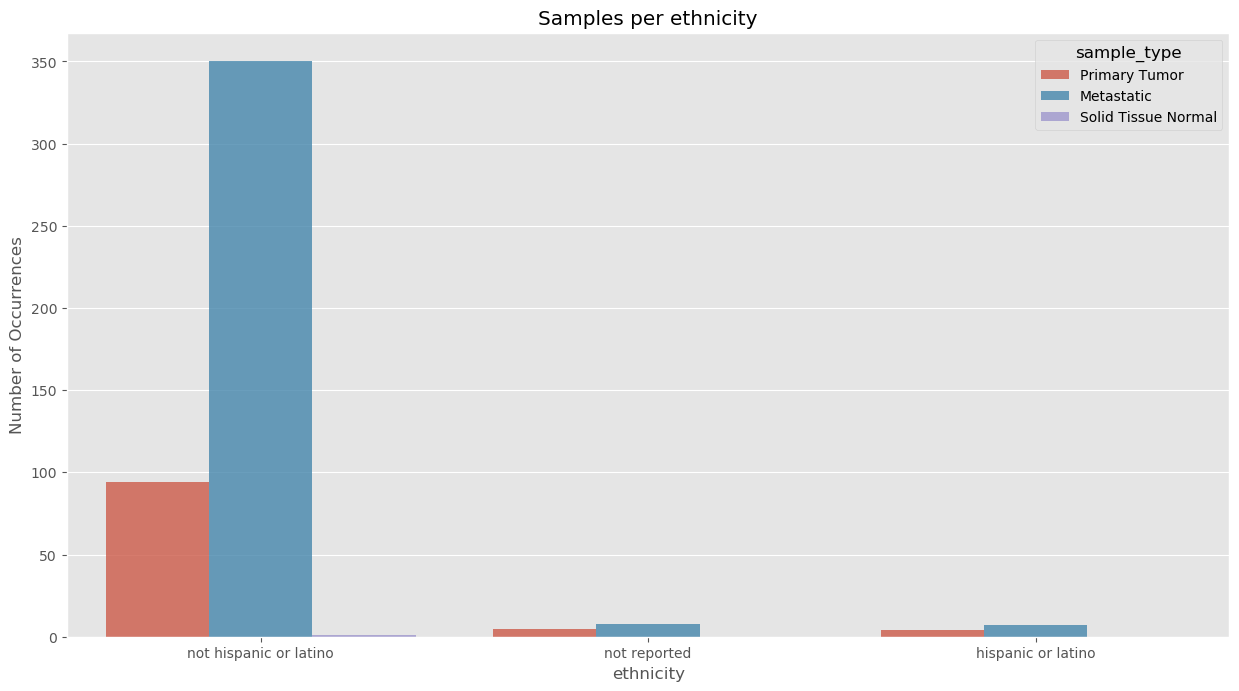

In [10]:
plt.figure()
sns.countplot(data=clinical_df, x='ethnicity', hue='sample_type', alpha=0.8)
plt.title('Samples per ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ethnicity', fontsize=12)
plt.show()

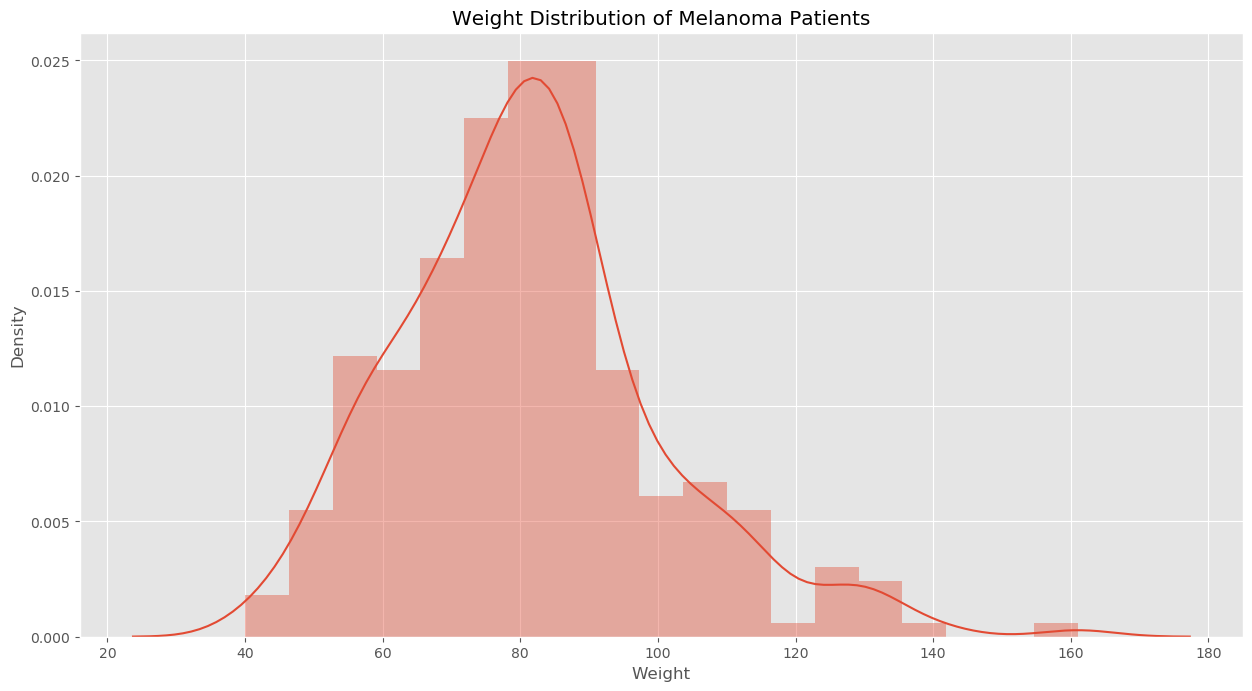

In [11]:
plt.figure()
sns.distplot(clinical_df.weight)
plt.title('Weight Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Weight', fontsize=12)
plt.show()

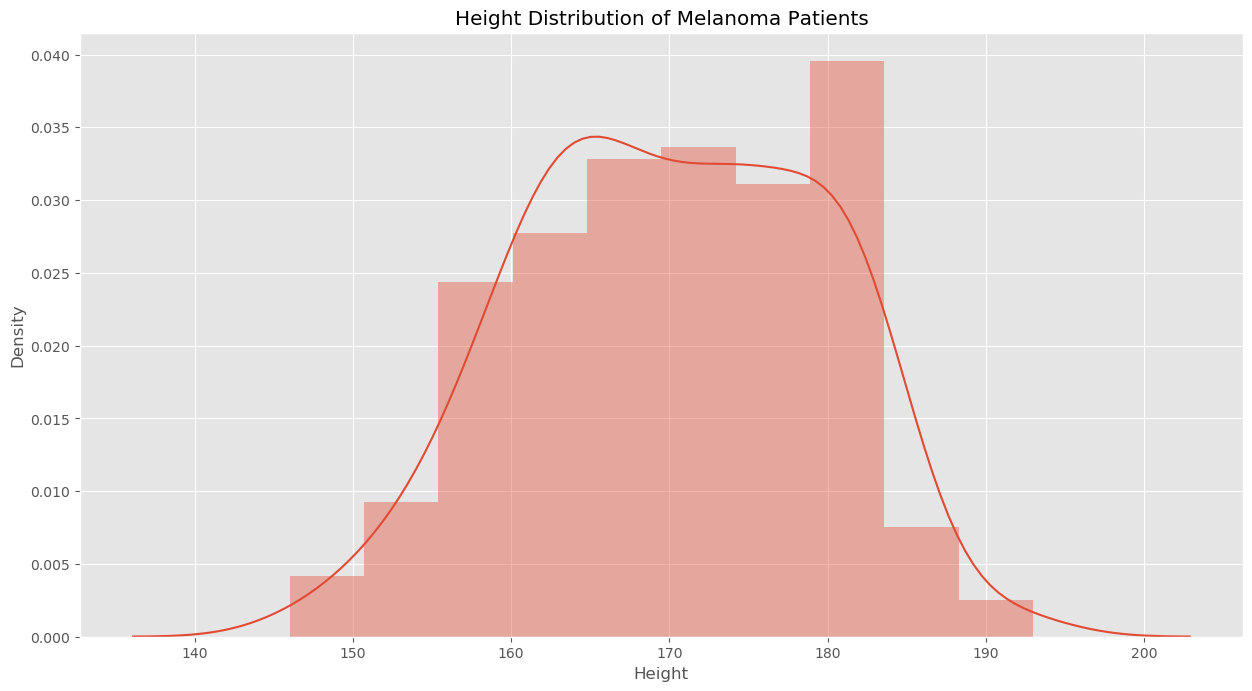

In [12]:
plt.figure()
sns.distplot(clinical_df.height)
plt.title('Height Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Height', fontsize=12)
plt.show()

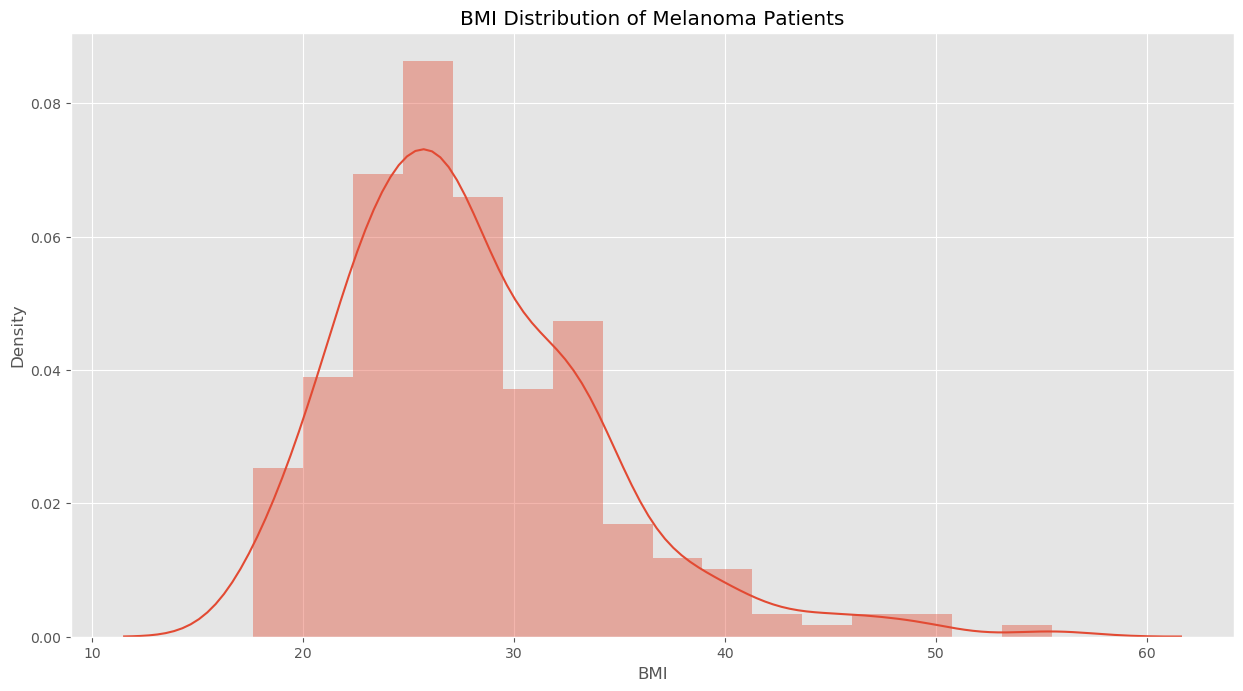

In [13]:
plt.figure()
sns.distplot(clinical_df.bmi)
plt.title('BMI Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('BMI', fontsize=12)
plt.show()

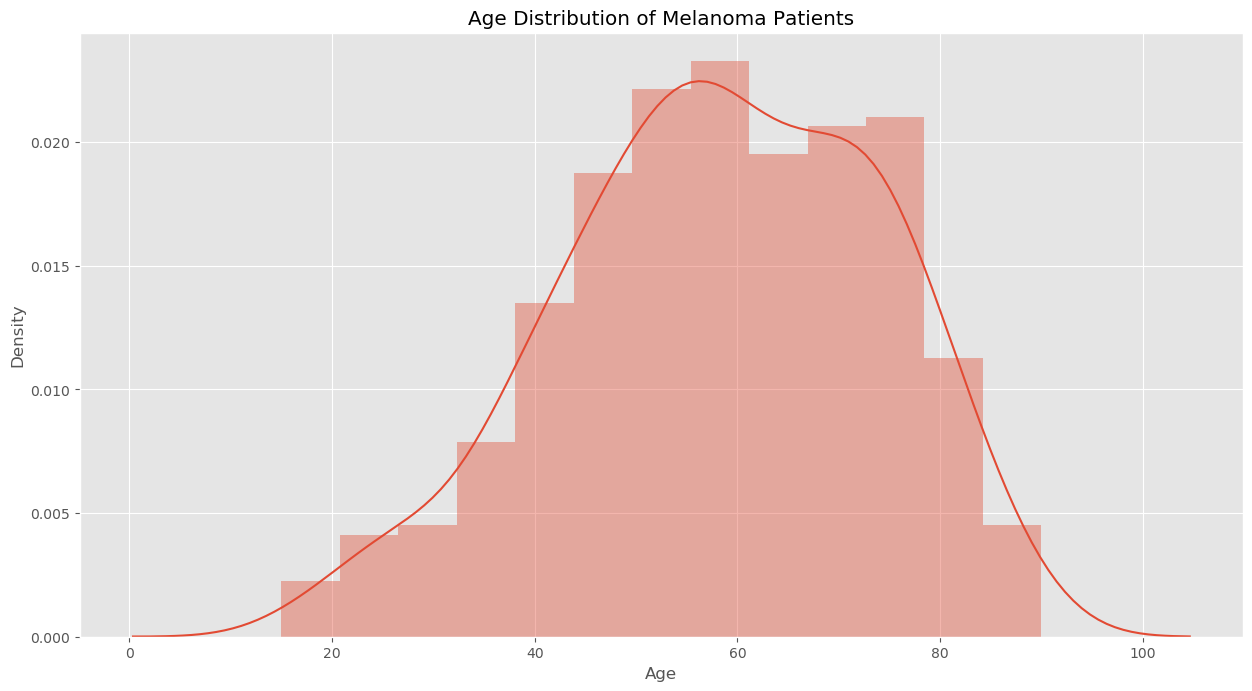

In [14]:
plt.figure()
sns.distplot(clinical_df.age_at_index)
plt.title('Age Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

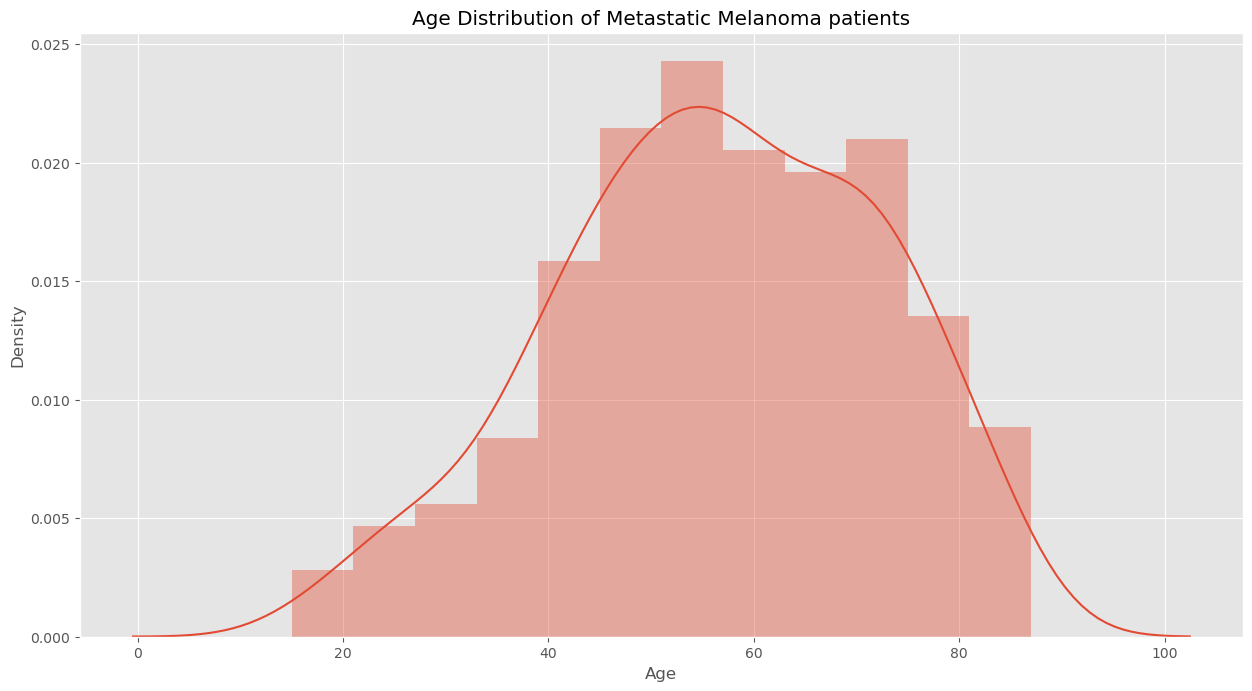

In [15]:
plt.figure()
sns.distplot(clinical_df[clinical_df["sample_type"] ==  "Metastatic"].age_at_index)
plt.title('Age Distribution of Metastatic Melanoma patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

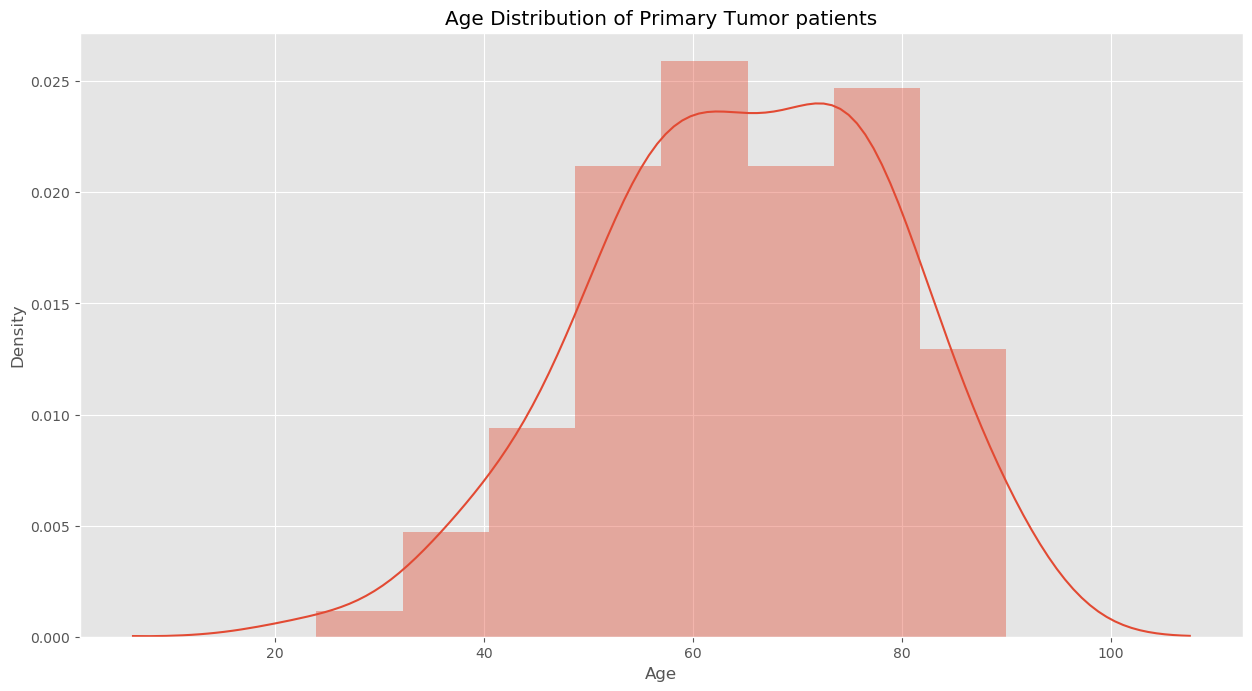

In [16]:
plt.figure()
sns.distplot(clinical_df[clinical_df["sample_type"] ==  "Primary Tumor"].age_at_index, hist = True)
plt.title('Age Distribution of Primary Tumor patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

In [17]:
clinical_df['sample_type'].value_counts()

Metastatic             365
Primary Tumor          103
Solid Tissue Normal      1
Name: sample_type, dtype: int64

In [18]:
clinical_df['race'].value_counts()

white                        447
asian                         12
not reported                  10
black or african american      1
Name: race, dtype: int64